<a href="https://colab.research.google.com/github/ramirobarone/Az204/blob/main/Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2025**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn


seaborn.set_context('talk')

## Lectura del dataset a ser analisado

Nota: En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

Columnas que tiene el dataset **df**

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.

Se seleccionaron las siguientes columnas:

* tools_programming_languages: para identificar cuáles lenguajes utilizan las personas encuestadas;  

* seniority: el nivel de experiencia puede aportar un mejor contexto para analizar y detectar si influye o no en el salario neto;

* company_main_activity: permite focalizar el análisis en una subpoblación si se considera relevante;

* salary_monthly_NETO: es la variable objetivo para determinar los lenguajes asociados a los mejores ingresos.



2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 300000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.


  Con el objetivo de eliminar valores extremos y erróneos se decidió trabajar con un rango de sueldos entre \$400000 y \$10.000.000. El valor superior fue determinado luego de analizar los percentiles 95 y 99.4 de la distribución del salario Neto, optando por el 99.4 ya que se considera que representa de un valor cercano a la realidad. En cuanto al valor mínimo se estableció en $400.000 tomando como referencia el monto de una beca en el sector de ciencia y tecnología de un ente autárquico del Gobierno de la Provincia de Córdoba.

Adicionalmente se filtraron las respuestas donde las personas trabajan de manera remunerada, descartando a los que no detallaron su salario.

También se hizo un ranking con los 10 mejores salarios donde se observa que están directamente asociados al nivel de seniority "Senior"  (Acá no se qué agregar como conlusión relacionado los lenguajes que usan, habíamos hablado de Ruby que lo usaban pocas personas)








3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 1000K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
df.columns

Index(['Unnamed: 0', 'work_province', 'work_dedication', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_last_dollar_value', 'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'estas_buscando_trabajo', 'pluriempleo',
       'company_main_activity', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'company_days_in_the_office',
       'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
       'opcionalen_que_empresaorganizacion_estas_trabajando',

Realizamos la limpieza de todas las lineas con salario neto mensual com NAN, e realizamos una vision general de muestra.

- Podemos percebir que de la muestra total de personas, la media tiene un salario 1.072550e+10 pesos, con salarios que oscilan entre 4 e 5.309001e+13 pesos.

In [ ]:
df1=df.dropna(subset=["salary_monthly_NETO"])
df1.salary_monthly_NETO.describe()

,salary_monthly_NETO
count,4.951000e+03
mean,1.072550e+10
std,7.545122e+11
min,4.000000e+00
25%,1.288264e+06
50%,1.916958e+06
75%,2.893500e+06
max,5.309001e+13


Vamos analisar como estan distribuidos los salarios de las personas para poder entender los cortes que pueden ser realizados en la muestra asi podemos tener una muestra representativa. Analisando los quantiles podemos ver que:

In [ ]:
k1=df1["salary_monthly_NETO"].quantile(0.95)
n_below = len(df1[df1["salary_monthly_NETO"] < k1])
n_above = len(df1[df1["salary_monthly_NETO"] > k1])
print('Percentil {} de la columna {}: {}'.format(95, "salary_monthly_NETO", k1))
print('% de datos menor que percentil {}: {}'.format(95, n_below / len(df1)))
print('% de datos mayor que percentil {}: {}'.format(95, n_above / len(df1)))

k=df["salary_monthly_NETO"].quantile(0.994)
n_below = len(df[df["salary_monthly_NETO"] < k])
n_above = len(df[df["salary_monthly_NETO"] > k])
print('Percentil {} de la columna {}: {}'.format(99.4, "salary_monthly_NETO", k))
print('% de datos menor que percentil {}: {}'.format(99.4, n_below / len(df1)))
print('% de datos mayor que percentil {}: {}'.format(99.4, n_above / len(df1)))

Percentil 95 de la columna salary_monthly_NETO: 5200000.0
% de datos menor que percentil 95: 0.9495051504746516
% de datos mayor que percentil 95: 0.04807109674813169
Percentil 99.4 de la columna salary_monthly_NETO: 10000000.0
% de datos menor que percentil 99.4: 0.9935366592607554
% de datos mayor que percentil 99.4: 0.005453443748737629


<Axes: xlabel='salary_monthly_NETO'>

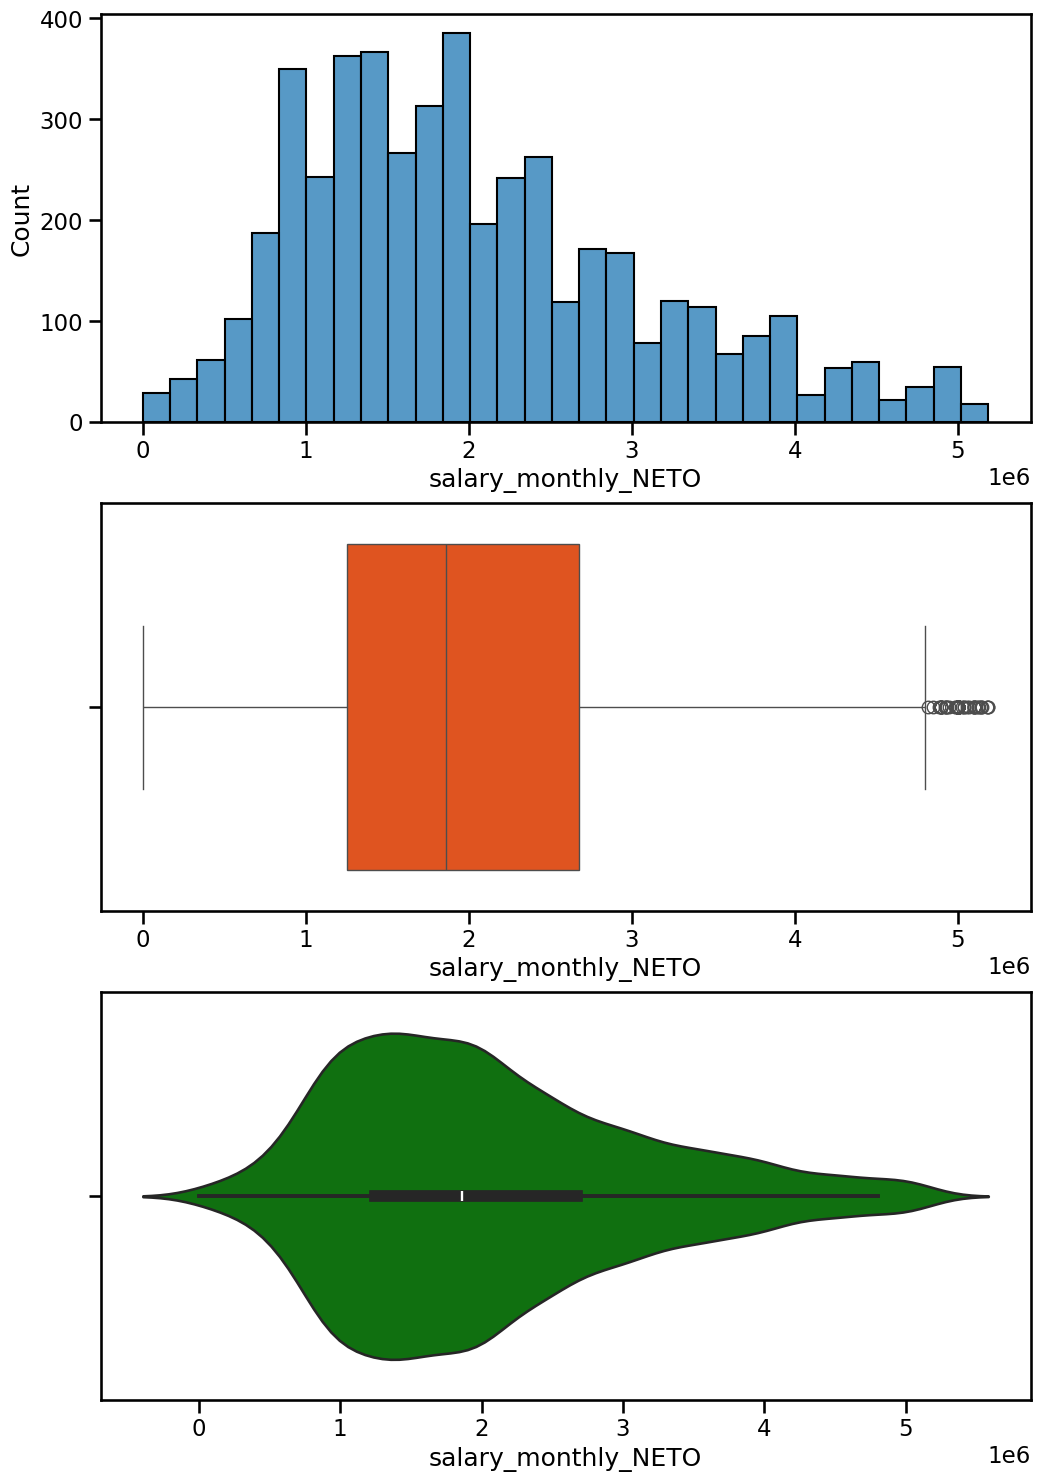

In [ ]:
fig, axes = plt.subplots(figsize=(12, 18), nrows=3)
seaborn.histplot(x=df1[df1["salary_monthly_NETO"]<k1].salary_monthly_NETO, ax=axes[0])
seaborn.boxplot(x=df1[df1["salary_monthly_NETO"]<k1].salary_monthly_NETO, color='orangered',ax=axes[1])
seaborn.violinplot(x=df1[df1["salary_monthly_NETO"]<k1].salary_monthly_NETO, color='green',ax=axes[2])

<Axes: xlabel='salary_monthly_NETO'>

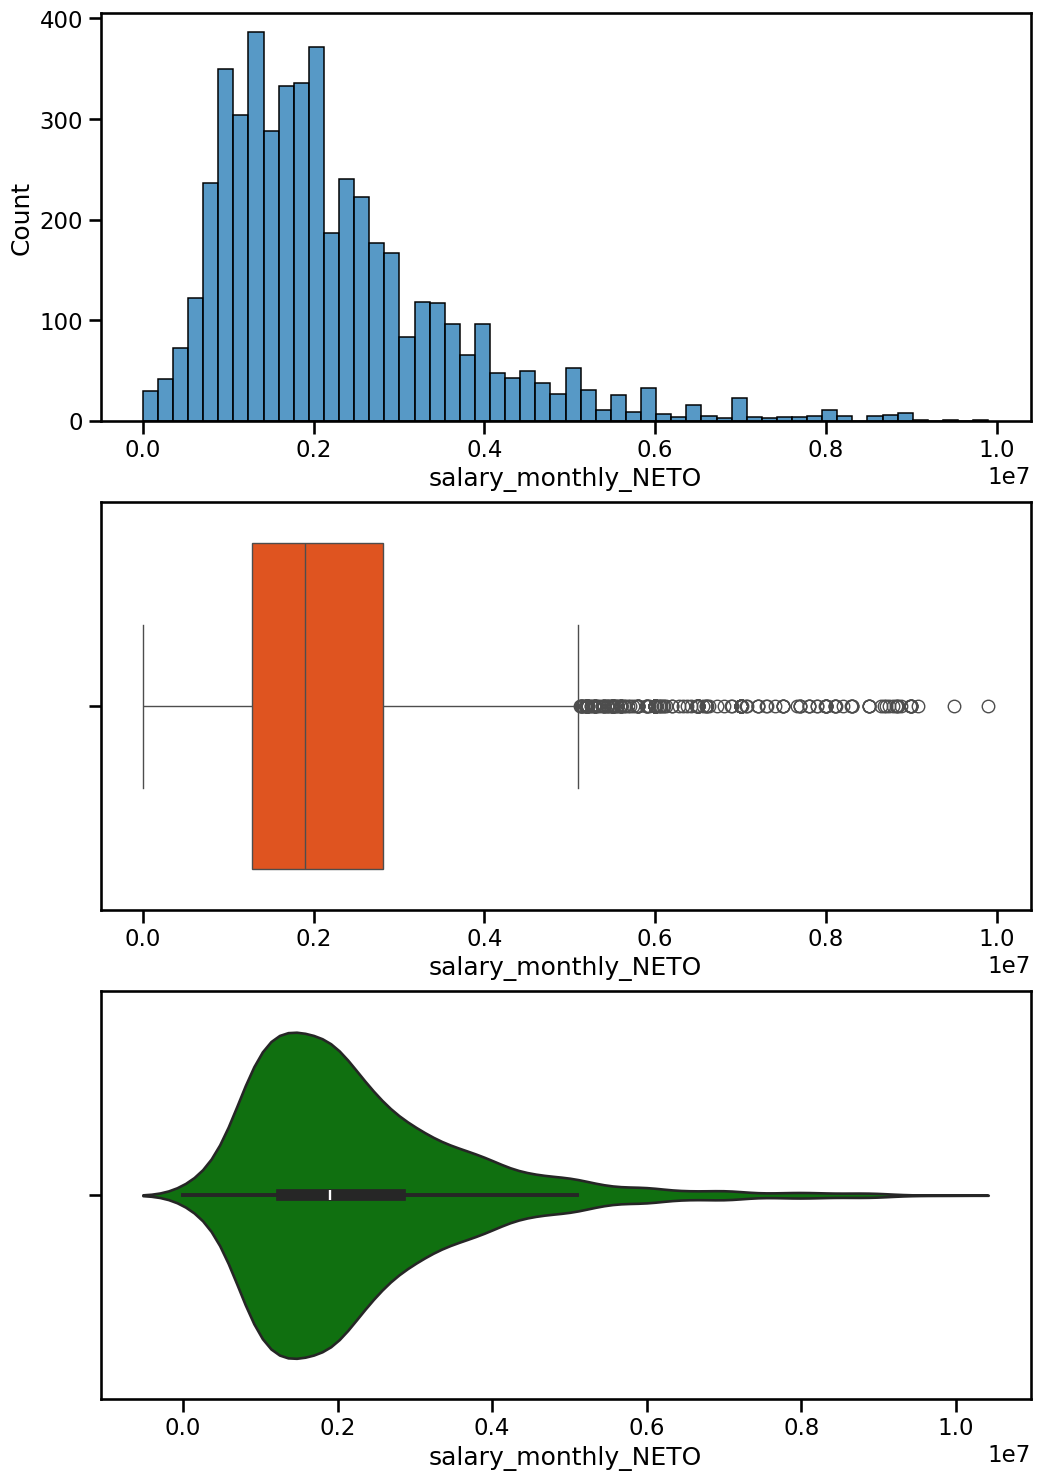

In [ ]:
fig, axes = plt.subplots(figsize=(12, 18), nrows=3)
seaborn.histplot(x=df1[df1["salary_monthly_NETO"]<k].salary_monthly_NETO, ax=axes[0])
seaborn.boxplot(x=df1[df1["salary_monthly_NETO"]<k].salary_monthly_NETO, color='orangered',ax=axes[1])
seaborn.violinplot(x=df1[df1["salary_monthly_NETO"]<k].salary_monthly_NETO, color='green',ax=axes[2])

De las graficas anteriores, considerando el percentil 99.4 de la columna salary_monthly_NETO es de 10000000, y que la distribucion de los datos que estamos considerando é de aproximadamente del 99.3%. Consideramos que el corte de salario para analisis superior va a ser de 100000000 para ter una representacion considerable para incluir en la muestra. Y realizamos el corte inferior de 400000 porque es una valor razonable considerando el salario minimo en la Republica Argentina es de 300000, pero ese valor puede ser un poco mayor para las personas que trabajan con TI.

La nueva muestra para analises será df1.


In [ ]:
df1= df1[(df1["salary_monthly_NETO"]<k) & (df1["salary_monthly_NETO"]>400000) ]

De la muestra selecionada podemos ver que:

In [ ]:
print('Salario minimo de: '+ str(numpy.round(df1.salary_monthly_NETO.min(),2)))
print('Salario maximo de: '+str(numpy.round(df1.salary_monthly_NETO.max(),2)))
print('Salario medio de: '+str(numpy.round(df1.salary_monthly_NETO.mean(),2)))
print('La mediana del salario es de: '+str(numpy.round(df1.salary_monthly_NETO.median(),2)))

Salario minimo de: 415000.0
Salario maximo de: 9900000.0
Salario medio de: 2287989.24
La mediana del salario es de: 1950000.0


NOTA: NO QUEDO BIEN!!

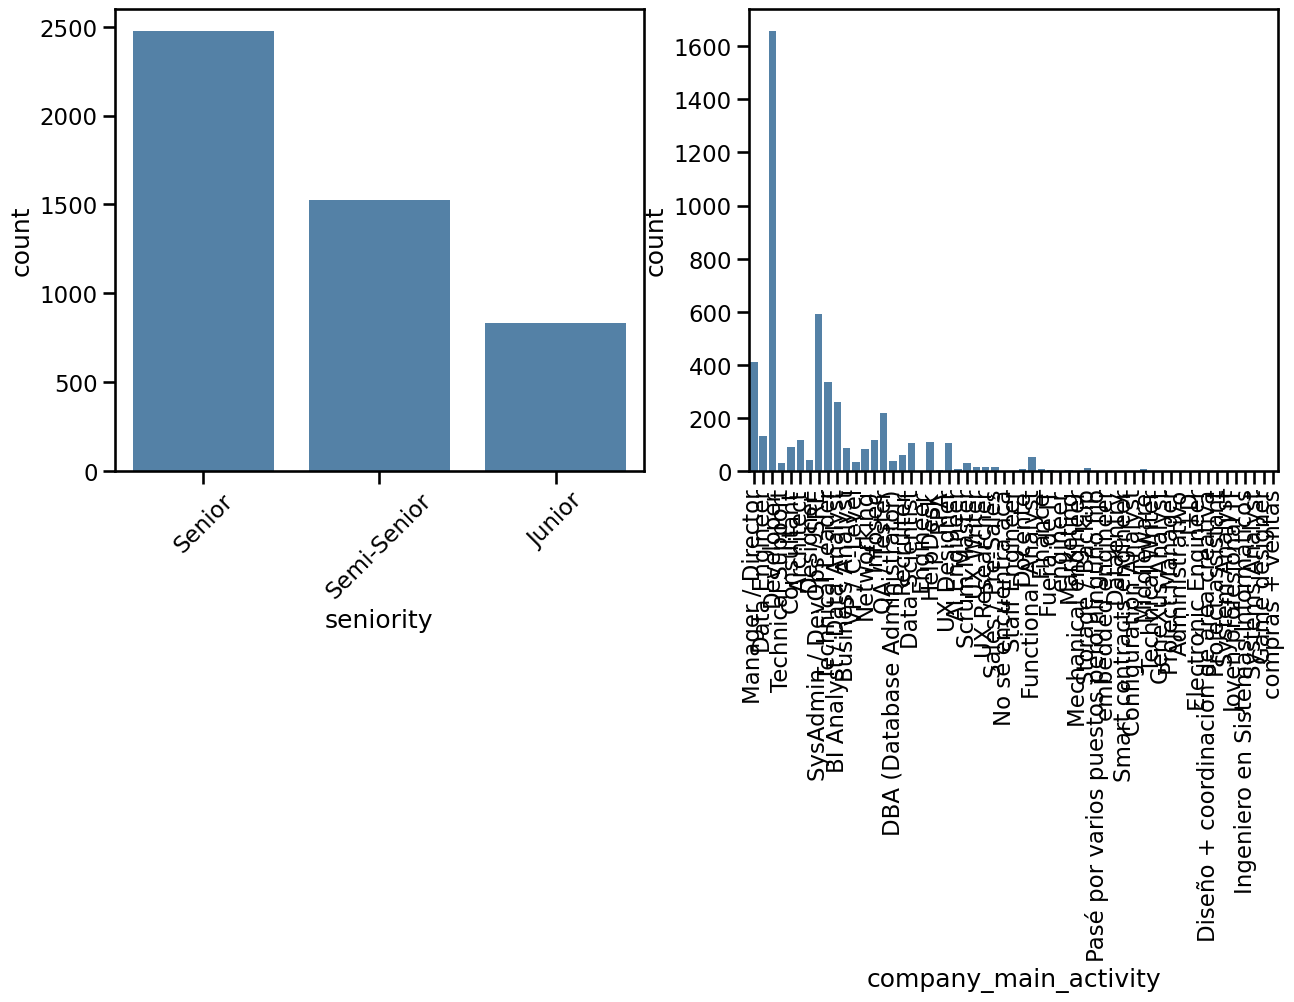

In [ ]:
sorted_main_activity = ['Manager / Director', 'Data Engineer', 'Developer',
       'Technical Support', 'Consultant', 'Architect', 'Designer',
       'SysAdmin / DevOps / SRE', 'Technical Leader',
       'BI Analyst / Data Analyst', 'Business Analyst', 'VP / C-Level',
       'Networking', 'Infosec', 'QA / Tester',
       'DBA (Database Administrator)', 'Recruiter', 'Data Scientist',
       'Engineer', 'HelpDesk', 'RPA', 'UX Designer', 'AI Engineer',
       'Scrum Master', 'UX Writer', 'UX Researcher', 'Sales / Pre-Sales',
       'No sé encuentra acá', 'Staff Engineer', 'Docente',
       'Functional Analyst', 'Finance', 'Fuera de IT', 'engineer',
       'Marketing', 'Mechanical engineer', 'Storage / Backup',
       'Pasé por varios puestos pero ninguno fijo', 'embedded engineer',
       'Dataentry', 'Smart contracts engineer', 'Configuration Analyst',
       'Middleware', 'Technical Writer', 'GeneXus Analyst',
       'Project Manager', 'Administrativo', 'I+D', 'Electronic Engineer',
       'Diseño + coordinación de área creativa', 'Project assistant',
       'System Analyst', 'Joven profesional IT',
       'Ingeniero en Sistemas Informáticos', 'Systems Analyst',
       'Game designer', 'compras + ventas']
sorted_senirority = ['Senior', 'Semi-Senior', 'Junior']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(x= df1.seniority, color='steelblue', ax=axes[0],order=sorted_senirority)
g1 = seaborn.countplot(x= df1.company_main_activity, color='steelblue', ax=axes[1],
                  order=sorted_main_activity)
# Rotate labels for the first subplot (axes[0])
axes[0].tick_params(axis='x', labelrotation=45)

# Keep labels vertical for the second subplot (axes[1])
axes[1].tick_params(axis='x', labelrotation=90)

Escogimos las siguientes 4 columnas para analisar en la muestra: [tools_programming_languages','seniority','company_main_activity','salary_monthly_NETO'].

Entendemos que esas propiedades pueden tener un relacionamiento con el salario de los profesionales de la muestra analisada

In [ ]:
# Group by programming language and calculate the average salary
language_salary = df1.groupby(['tools_programming_languages','seniority','company_main_activity'])['salary_monthly_NETO'].mean().sort_values(ascending=False)

# Display the top N languages with the highest average salaries
N = 10  # You can adjust this to see more or fewer languages
print(language_salary.head(N))

tools_programming_languages                     seniority  company_main_activity
Python, SQL                                     Senior     VP / C-Level             9000000.0
Ruby, Swift                                     Senior     Developer                9000000.0
CSS, HTML, Javascript, Python, SQL, TypeScript  Senior     Developer                8982820.0
PHP                                             Senior     Technical Leader         8880000.0
Javascript, Python, SQL, TypeScript             Senior     Data Engineer            8845000.0
Groovy, Java, Javascript                        Senior     Developer                8790000.0
CSS, Javascript, PHP                            Junior     Developer                8735000.0
CSS, Go, HTML, Javascript, TypeScript           Senior     Developer                8684000.0
Javascript, Rust, TypeScript                    Senior     Technical Leader         8640000.0
Javascript, TypeScript, Solodity                Senior     Technical Lead

En la tabla anterior podemos ver los resultados de los lenguajes de programacion que mas cobran considerando la media del salario bruto, agrupando por 'lenguaje de programacion','senioridad', 'tipo de actividad principal'.

En media las personas que trabajan con VP / C-level / Developer, que tiene cargo Senior y que saben Python/SQL/Ruby/Swift tienen los mayores salarios netos de la muestra analisadas.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','seniority','profile_years_experience']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,seniority,profile_years_experience,cured_programming_languages
1,css,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Senior,12,"[css, html, java, javascript, sql, typescript]"
1,html,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Senior,12,"[css, html, java, javascript, sql, typescript]"
1,java,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Senior,12,"[css, html, java, javascript, sql, typescript]"
1,javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Senior,12,"[css, html, java, javascript, sql, typescript]"
1,sql,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Senior,12,"[css, html, java, javascript, sql, typescript]"
...,...,...,...,...,...,...
5193,kotlin,"Bash/Shell, Groovy, Java, Kotlin, SQL",2400000.0,Semi-Senior,3,"[bash/shell, groovy, java, kotlin, sql]"
5193,sql,"Bash/Shell, Groovy, Java, Kotlin, SQL",2400000.0,Semi-Senior,3,"[bash/shell, groovy, java, kotlin, sql]"
5194,php,"PHP, Python",4200000.0,Senior,20,"[php, python]"
5194,python,"PHP, Python",4200000.0,Senior,20,"[php, python]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

Realizamos el calculo de probabilidade de saber lenguaje de progracion para poder realizar un corte de los lenguajes mas populares.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count['percentage']=numpy.round((language_count['count']/language_count['count'].sum())*100.,2)
language_count

,frequency,count,percentage
0,sql,2295,15.52
1,javascript,1925,13.02
2,python,1689,11.42
3,html,1378,9.32
4,typescript,1078,7.29
...,...,...,...
230,ll,1,0.01
231,racf,1,0.01
232,bolero,1,0.01
233,(salesforce),1,0.01


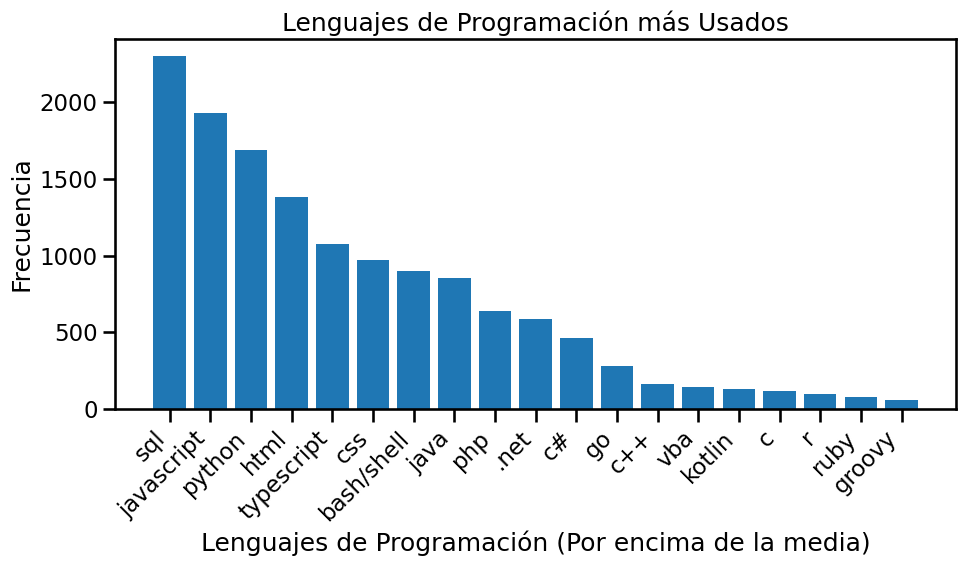

In [ ]:
#Capturar la media y luego filtrar los datos usando la media como el piso de busqueda

language_count = df_lang.programming_language.value_counts().reset_index().rename(columns={'index': 'language', 'programming_language': 'frequency'})
mediaLanguageUsed = language_count.loc[:, 'count'].mean()


filtered_language_count = language_count.loc[ language_count.loc[:, 'count'] > mediaLanguageUsed]

languages = filtered_language_count['frequency']
frequencies = filtered_language_count['count']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(languages, frequencies)

# Personalizar el gráfico
plt.xlabel("Lenguajes de Programación (Por encima de la media)")
plt.ylabel("Frecuencia")
plt.title("Lenguajes de Programación más Usados")
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Realizamos el corte para los lenguajes mas populares, considerando aquellos que tiene una frecuencia mayor al 5% en la muestra.

In [ ]:
language_count[language_count['percentage']>5.]

,frequency,count,percentage
0,sql,2295,15.52
1,javascript,1925,13.02
2,python,1689,11.42
3,html,1378,9.32
4,typescript,1078,7.29
5,css,968,6.55
6,bash/shell,901,6.09
7,java,855,5.78


NOTA: **Seleccionado aqui el dataframe com los lenguajes mas populares, considerando el corte del 5%**

In [ ]:
df_lang1=df_lang[df_lang.programming_language.isin(language_count[language_count['percentage']>5.].frequency.unique())]
print('lenguajes mas populares, considerando el corte del 5%: '+str(df_lang1.programming_language.unique()))

lenguajes mas populares, considerando el corte del 5%: ['css' 'html' 'java' 'javascript' 'sql' 'typescript' 'bash/shell' 'python']


# Considerando la muestra con los lenguajes mas populares, realizamos el calculo de la probabilidad condicional para la muestra considerando en ese momento cual la probabilidade de saber los lenguajes de programacion mas populares y ganar mas que 9000000

In [ ]:
#SQL
interesting_languages = ["sql"]
sql = df_lang.programming_language.isin(interesting_languages)
probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_sql_9000000 = len(df_lang[sql & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_sql_9000000*100.,2)))

#CSS
interesting_languages = ["css"]
css = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_css_9000000 = len(df_lang[css & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_css_9000000*100.)))

#HTML
interesting_languages = ["html"]
html = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_html_9000000 = len(df_lang[html & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_html_9000000*100.)))

#JAVA
interesting_languages = ["java"]
java = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_java_9000000 = len(df_lang[java & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_java_9000000*100.)))

#JAVASCRIPT
interesting_languages = ["javascript"]
javascript = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_javascript_9000000 = len(df_lang[javascript & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_javascript_9000000*100.)))

#TYPESCRIPT
interesting_languages = ["typescript"]
typescript = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_typescript_9000000 = len(df_lang[typescript & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_typescript_9000000*100.)))

#PYTHON
interesting_languages = ["python"]
python = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_python_9000000 = len(df_lang[python & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_python_9000000*100.)))

#BASH/SHELL
interesting_languages = ["bash/shell"]
bash_shell = df_lang.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang.salary_monthly_NETO>9000000
P_bash_shell_9000000 = len(df_lang[bash_shell & probabilidade_9000000])/len(df_lang[probabilidade_9000000])
print('Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_bash_shell_9000000*100.)))

Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:15.7
Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:5.0
Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:7.0
Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:7.0
Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:10.0
Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:7.0
Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:14.0
Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:8.0


Separamos la muestra por tipos de cargo ['SENIOR', 'SEMI-SENIOR', 'JUNIOR'] y calculamos la probabilidade condicional nuevamente

In [ ]:
df_lang_senior=df_lang[df_lang.seniority.isin(['Senior'])]
df_lang_semi_senior=df_lang[df_lang.seniority.isin(['Semi-Senior'])]
df_lang_junior=df_lang[df_lang.seniority.isin(['Junior'])]

#Calculamos la probabilidade condicional de saber ['css', 'html','java','javascript','sql','typescript','bash/shell','python'] e ganar mas que $ 9000000 siendo SENIOR

In [ ]:
#SQL
interesting_languages = ["sql"]
sql = df_lang_senior.programming_language.isin(interesting_languages)
probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_sql_9000000 = len(df_lang_senior[sql & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_sql_9000000*100.)))

#CSS
interesting_languages = ["css"]
css = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_css_9000000 = len(df_lang_senior[css & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_css_9000000*100.)))

#HTML
interesting_languages = ["html"]
html = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_html_9000000 = len(df_lang_senior[html & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_html_9000000*100.)))

#JAVA
interesting_languages = ["java"]
java = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_java_9000000 = len(df_lang_senior[java & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_java_9000000*100.)))

#JAVASCRIPT
interesting_languages = ["javascript"]
javascript = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_javascript_9000000 = len(df_lang_senior[javascript & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_javascript_9000000*100.)))

#TYPESCRIPT
interesting_languages = ["typescript"]
typescript = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_typescript_9000000 = len(df_lang_senior[typescript & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_typescript_9000000*100.)))

#PYTHON
interesting_languages = ["python"]
python = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_python_9000000 = len(df_lang_senior[python & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_python_9000000*100.)))

#BASH/SHELL
interesting_languages = ["bash/shell"]
bash_shell = df_lang_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_senior.salary_monthly_NETO>9000000
P_bash_shell_9000000 = len(df_lang_senior[bash_shell & probabilidade_9000000])/len(df_lang_senior[probabilidade_9000000])
print('Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_bash_shell_9000000*100.)))



Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:14.0
Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:6.0
Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:8.0
Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:6.0
Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:11.0
Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:8.0
Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:13.0
Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:8.0


#Calculamos la probabilidade condicional de saber ['css', 'html','java','javascript','sql','typescript','bash/shell','python'] e ganar mas que $ 9000000 siendo SEMI-SENIOR**

In [ ]:
#SQL
interesting_languages = ["sql"]
sql = df_lang_semi_senior.programming_language.isin(interesting_languages)
probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_sql_9000000 = len(df_lang_semi_senior[sql & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_sql_9000000*100.)))

#CSS
interesting_languages = ["css"]
css = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_css_9000000 = len(df_lang_semi_senior[css & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_css_9000000*100.)))

#HTML
interesting_languages = ["html"]
html = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_html_9000000 = len(df_lang_semi_senior[html & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_html_9000000*100.)))

#JAVA
interesting_languages = ["java"]
java = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_java_9000000 = len(df_lang_semi_senior[java & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_java_9000000*100.)))

#JAVASCRIPT
interesting_languages = ["javascript"]
javascript = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_javascript_9000000 = len(df_lang_semi_senior[javascript & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_javascript_9000000*100.)))

#TYPESCRIPT
interesting_languages = ["typescript"]
typescript = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_typescript_9000000 = len(df_lang_semi_senior[typescript & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_typescript_9000000*100.)))

#PYTHON
interesting_languages = ["python"]
python = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_python_9000000 = len(df_lang_semi_senior[python & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_python_9000000*100.)))

#BASH/SHELL
interesting_languages = ["bash/shell"]
bash_shell = df_lang_semi_senior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_semi_senior.salary_monthly_NETO>9000000
P_bash_shell_9000000 = len(df_lang_semi_senior[bash_shell & probabilidade_9000000])/len(df_lang_semi_senior[probabilidade_9000000])
print('Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_bash_shell_9000000*100.)))

Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:22.0
Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:0.0
Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:11.0
Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:11.0
Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:0.0
Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:11.0
Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:22.0
Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:11.0


#Calculamos la probabilidade condicional de saber ['css', 'html','java','javascript','sql','typescript','bash/shell','python'] e ganar mas que $ 9000000 siendo JUNIOR**

In [ ]:
#SQL
interesting_languages = ["sql"]
sql = df_lang_junior.programming_language.isin(interesting_languages)
probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_sql_9000000 = len(df_lang_junior[sql & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_sql_9000000*100.)))

#CSS
interesting_languages = ["css"]
css = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_css_9000000 = len(df_lang_junior[css & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_css_9000000*100.)))

#HTML
interesting_languages = ["html"]
html = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_html_9000000 = len(df_lang_junior[html & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_html_9000000*100.)))

#JAVA
interesting_languages = ["java"]
java = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_java_9000000 = len(df_lang_junior[java & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_java_9000000*100.)))

#JAVASCRIPT
interesting_languages = ["javascript"]
javascript = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_javascript_9000000 = len(df_lang_junior[javascript & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_javascript_9000000*100.)))

#TYPESCRIPT
interesting_languages = ["typescript"]
typescript = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_typescript_9000000 = len(df_lang_junior[typescript & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_typescript_9000000*100.)))

#PYTHON
interesting_languages = ["python"]
python = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_python_9000000 = len(df_lang_junior[python & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_python_9000000*100.)))

#BASH/SHELL
interesting_languages = ["bash/shell"]
bash_shell = df_lang_junior.programming_language.isin(interesting_languages)
#probabilidade_9000000 = df_lang_junior.salary_monthly_NETO>9000000
P_bash_shell_9000000 = len(df_lang_junior[bash_shell & probabilidade_9000000])/len(df_lang_junior[probabilidade_9000000])
print('Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:'+str(numpy.round(P_bash_shell_9000000*100.)))



Probabilidade de saber SQL e ganhar acima dos 9000000 pesos:33.0
Probabilidade de saber CSS e ganhar acima dos 9000000 pesos:0.0
Probabilidade de saber HTML e ganhar acima dos 9000000 pesos:0.0
Probabilidade de saber JAVA e ganhar acima dos 9000000 pesos:17.0
Probabilidade de saber JAVASCRIPT e ganhar acima dos 9000000 pesos:0.0
Probabilidade de saber TYPESCRIPT e ganhar acima dos 9000000 pesos:0.0
Probabilidade de saber PYTHON e ganhar acima dos 9000000 pesos:17.0
Probabilidade de saber BASH/SHELL e ganhar acima dos 9000000 pesos:0.0


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,seniority,profile_years_experience,cured_programming_languages
3,python,"Bash/Shell, CSS, HTML, Javascript, PHP, Python",1360000.00,Semi-Senior,5,"[bash/shell, css, html, javascript, php, python]"
4,python,"Bash/Shell, Python",NaN,Senior,6,"[bash/shell, python]"
6,python,".NET, Python, SQL",4000000.00,Senior,25,"[.net, python, sql]"
7,python,"C++, Python",3600000.00,Senior,15,"[c++, python]"
9,python,"Bash/Shell, Python, SQL",3258576.49,Senior,15,"[bash/shell, python, sql]"


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




NOTA:
- variables numericas: 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'profile_age','profile_years_experience'
- Variables categoricas: 'Seniority', 'company_main_activity', 'work_dedication', 'profile_studies_level'

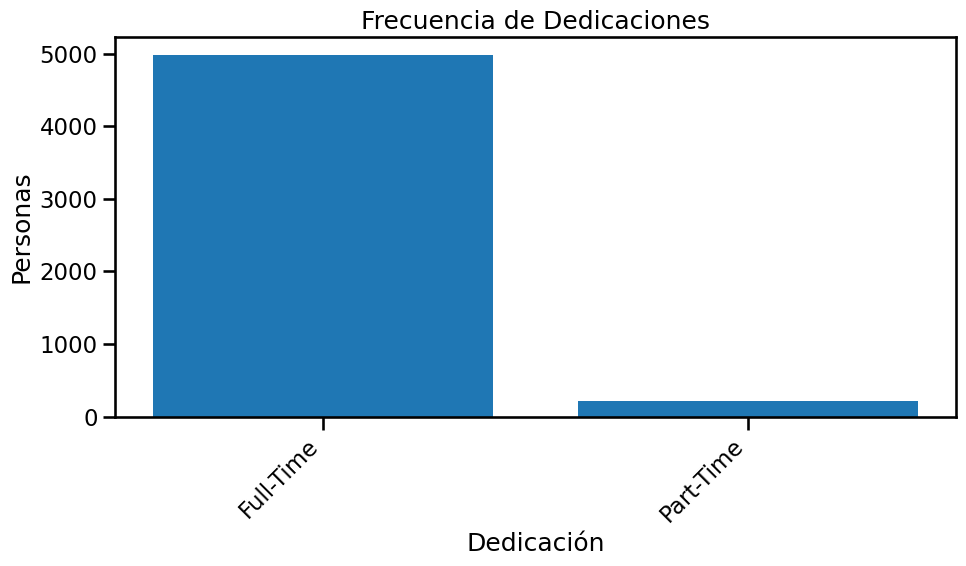

In [ ]:
salary = 'salary_monthly_NETO'
dedication = 'work_dedication'

salary_dedication = df.loc[:,('salary_monthly_NETO','work_dedication')]

wordDedications = salary_dedication.work_dedication.value_counts().reset_index().rename(columns={'index': 'dedication', 'work_dedication': 'frequency'})
wordDedications
dedications = wordDedications['count']
frequencies = wordDedications['frequency']

plt.figure(figsize=(10, 6))
plt.bar(frequencies, dedications)

plt.xlabel('Dedicación')
plt.ylabel('Personas')
plt.title('Frecuencia de Dedicaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
promedioFullTime = df.loc[(df['work_dedication'] == 'Full-Time')& (df['salary_monthly_BRUTO']<12000000 )].salary_monthly_NETO.mean()
promedioPartTime = df.loc[(df['work_dedication'] == 'Part-Time')& (df['salary_monthly_BRUTO']<12000000 )].salary_monthly_NETO.mean()

print('Promedio Full Time:', promedioFullTime)
print('Promedio Part Time:', promedioPartTime)


Promedio Full Time: 11228923770.693775
Promedio Part Time: 1186308.454764151


Respuesta:

Para estudiar la distribución y el comportamiento de los datos, se pueden utilizar diversas herramientas visuales y modelos estadísticos:
Herramientas Visuales:

**Histogramas**: Muestran la distribución de frecuencias de una variable numérica, y ayudan a identificar la forma (simétrica, sesgada), moda(s) y presencia de outliers (valores extremos).

Boxplots: Resaltan la mediana, cuartiles y outliers de forma visual, y sirven para comparar distribuciones entre grupos y detectar valores atípicos.
Diagramas de Violin: Combinan boxplot + distribución de densidad.

Modelos Estadísticos y Matemáticos:
Medidas de tendencia central: Las utilizamos cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro.
Media: Te da una idea del "centro de masa" del histograma, aunque puede ser engañoso si hay outliers.

Mediana: Muy útil si hay outliers, ya que no se ve tan afectada como la media.

Moda: Útil si los datos están agrupados en torno a un valor.
Medidas de dispersión.

Desviación estándar: Muestra cuán dispersos están los datos respecto de la media.

Coeficiente de variación: Te permite comparar la dispersión relativa si analizás distintos grupos (por ejemplo, salarios de junior vs senior).
Medidas de posición
Cuartiles, percentiles y deciles: Muy útiles para entender la distribución de los datos (ej: ¿cuánto ganan el 25% que menos cobra? ¿Y el 10% mejor pago?)

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [3]:
seaborn.pairplot(data=df1, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)

NameError: name 'df1' is not defined

In [ ]:
matcov=numpy.cov(df1.salary_monthly_BRUTO,df1.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=numpy.corrcoef(df1.salary_monthly_BRUTO,df1.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

df1.salary_monthly_BRUTO.describe().apply(lambda s: '{0:.2f}'.format(s))
df1.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s))

matriz de varianza covarianza: 
 [[2.85065561e+12 2.24551051e+12]
 [2.24551051e+12 1.98289221e+12]] 

matriz de correlaciones: 
  [[1.         0.94448086]
 [0.94448086 1.        ]] 

correlación entra ambas variables:  0.9444808636850358 



,salary_monthly_NETO
count,4833.00
mean,2287989.24
std,1408152.05
min,415000.00
25%,1300000.00
50%,1950000.00
75%,2886992.14
max,9900000.00


In [ ]:
#Existe

\## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
dfClear = df.dropna(subset=["profile_studies_level", 'salary_monthly_NETO'])

salariesByLevel = dfClear.loc[:, ['profile_studies_level','salary_monthly_NETO']]


,profile_studies_level,salary_monthly_NETO
1,Universitario,10200000.0
5,Secundario,2167989.0
6,Maestría,4000000.0
7,Universitario,3600000.0
12,Universitario,4780000.0
...,...,...
5185,Universitario,4000000.0
5187,Universitario,2600000.0
5189,Secundario,1100000.0
5191,Terciario,1800000.0


      profile_studies_level  salary_monthly_NETO
0                 Doctorado         3.640648e+06
1                  Maestría         3.127509e+06
3  Posgrado/Especialización         2.625036e+06
2              Posdoctorado         2.517317e+06
6             Universitario         2.312958e+06
4                Secundario         1.863952e+06
5                 Terciario         1.828714e+06


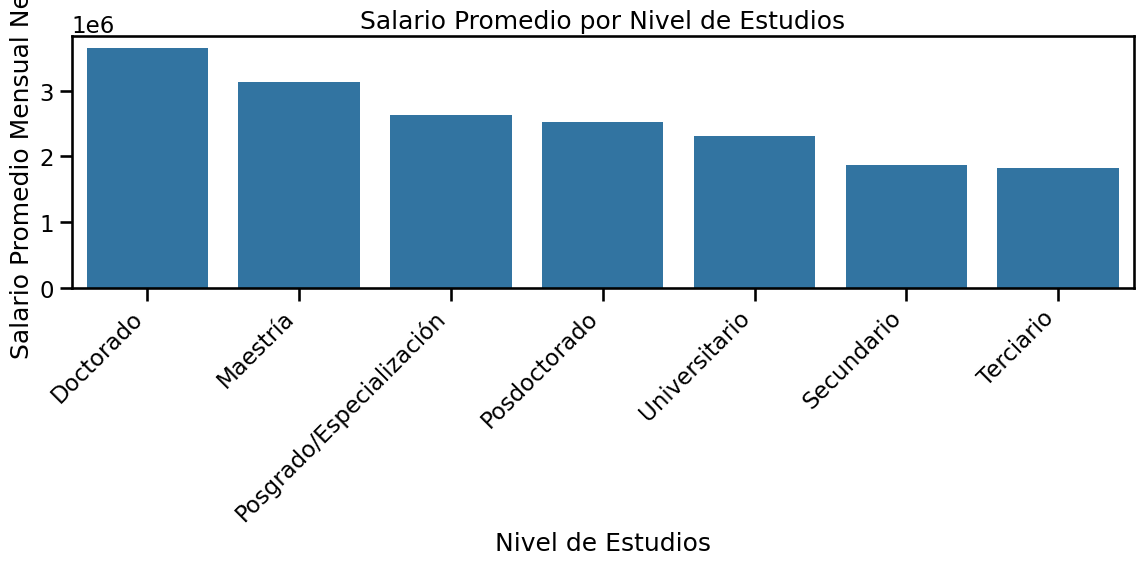

In [ ]:


# Agrupar por 'profile_studies_level' y calcular el promedio de 'salary_monthly_NETO'
salary_by_studies = df\
.groupby('profile_studies_level')['salary_monthly_NETO']\
.mean()\
.reset_index()\
.sort_values(by='salary_monthly_NETO', ascending=False)

# Mostrar el resultado
print(salary_by_studies)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura si es necesario
seaborn.barplot(x='profile_studies_level', y='salary_monthly_NETO', data=salary_by_studies)

# Personalizar el gráfico
plt.xlabel("Nivel de Estudios")
plt.ylabel("Salario Promedio Mensual Neto")
plt.title("Salario Promedio por Nivel de Estudios")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

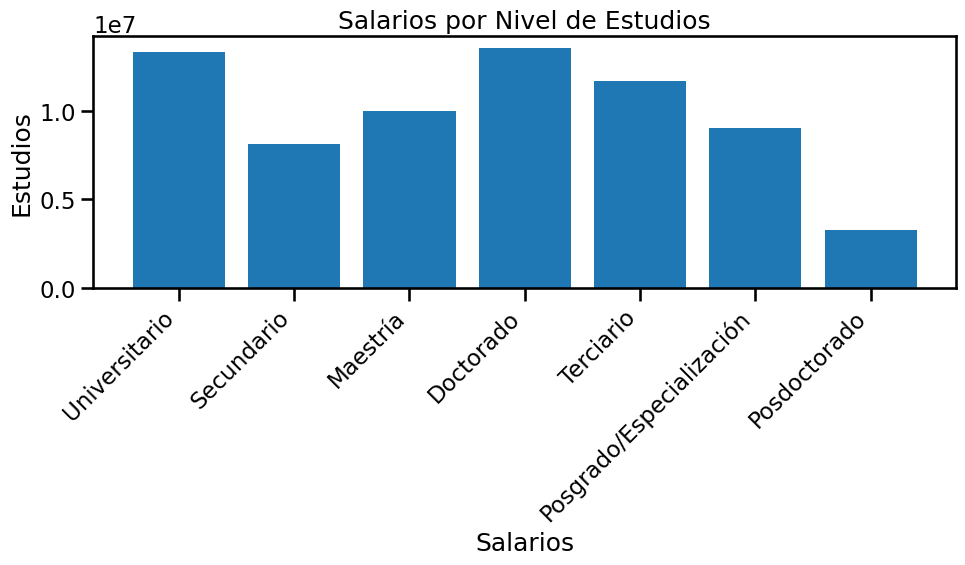

In [ ]:
salary = dfClear['salary_monthly_NETO']
studies = dfClear['profile_studies_level']

plt.figure(figsize =(10,6))
plt.bar(studies, salary)

plt.xlabel('Salarios')
plt.ylabel('Estudios')
plt.title('Salarios por Nivel de Estudios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
